In [1]:
"""
Import libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import datetime
from scipy import stats

In [119]:
#Assessment Page Views
#This is only 10000 rows so Jupyter notebook can handle it. The actual dataset will be used in the iPython shell.
page_views = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Page Views Fall 2018.csv', nrows = 10000, index_col = 0)
#Final Grade Export
grades = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Student Final Grades 2018 Anonymous.csv', index_col = 0)

In [130]:
grades = grades.loc[:,['student id','unposted final score']]
grades.head()

,student id,unposted final score
0,37888,86.29
1,37902,93.67
2,37956,93.09
3,38080,95.92
4,38176,83.30


In [131]:
bottom = np.percentile(grades['unposted final score'], 5)
bottom

43.7895

In [132]:
grades = grades[grades['unposted final score'] > bottom]

In [133]:
grades.head()

,student id,unposted final score
0,37888,86.29
1,37902,93.67
2,37956,93.09
3,38080,95.92
4,38176,83.30


In [134]:
grades.describe()

,student id,unposted final score
count,2848.000000,2848.000000
mean,37949.282303,86.533157
std,3944.379354,10.634376
min,263.000000,43.890000
25%,37649.750000,82.115000
50%,38478.500000,89.870000
75%,39327.250000,94.010000
max,43670.000000,103.070000


In [135]:
def create_bucket(x):
    #These are created using the values from describe function above.
    buckets = [[105, 93.807500], [93.807500,89.235000], [89.235000, 80.102500], [80.102500, 10.350000]]
    for i in range(4):
        if (x < buckets[i][0]) & (x >= buckets[i][1]):
            return (3-i)
grades['grade_bucket'] = grades['unposted final score'].apply(create_bucket)    

In [136]:
grades.head()

,student id,unposted final score,grade_bucket
0,37888,86.29,1
1,37902,93.67,2
2,37956,93.09,2
3,38080,95.92,3
4,38176,83.30,1


In [137]:
def create_pass(x):
    buckets = [[105, 60], [60,0]]
    for i in range(2):
        if (x < buckets[i][0]) & (x >= buckets[i][1]):
            return (1-i)
grades['pass'] = grades['unposted final score'].apply(create_pass)
grades.head()

,student id,unposted final score,grade_bucket,pass
0,37888,86.29,1,1
1,37902,93.67,2,1
2,37956,93.09,2,1
3,38080,95.92,3,1
4,38176,83.30,1,1


In [138]:
grades.shape

(2848, 4)

In [105]:
time_format = '%Y-%m-%d %H:%M:%S UTC'
page_views['created_at_object'] = pd.to_datetime(page_views['created_at'], format=time_format)  

In [106]:
df = page_views.loc[:,['user_param_external_user_id','duration','created_at_object']]
df.head()

,user_param_external_user_id,duration,created_at_object
assessment_attempt_id,,,
289769,38922,1277.0,2018-11-09 10:37:31
286863,37374,2720.0,2018-11-09 10:38:07
289769,38922,736.0,2018-11-09 10:39:47
289769,38922,61.0,2018-11-09 10:41:25
289769,38922,22.0,2018-11-09 10:41:26


In [107]:
weeks = [pd.Timestamp(datetime.date(2018, 8, 18)), pd.Timestamp(datetime.date(2018, 9, 1)),
         pd.Timestamp(datetime.date(2018, 9, 8)),pd.Timestamp(datetime.date(2018, 9, 16)), pd.Timestamp(datetime.date(2018, 9, 23))]
weeks


[Timestamp('2018-08-18 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-09-08 00:00:00'),
 Timestamp('2018-09-16 00:00:00'),
 Timestamp('2018-09-23 00:00:00')]

In [116]:
page_views.shape

(10000, 12)

In [ ]:
df['week'] = 0
week_1 = df[(df['created_at_object'] >= weeks[0]) & (df['created_at_object'] < weeks[1])]
week_1['week'] = 1

week_2 = df[(df['created_at_object'] >= weeks[1]) & (df['created_at_object'] < weeks[2])]
week_2['week'] = 2

week_3 = df[(df['created_at_object'] >= weeks[2]) & (df['created_at_object'] < weeks[3])]
week_3['week'] = 3

week_4 = df[(df['created_at_object'] >= weeks[3]) & (df['created_at_object'] < weeks[4])]
week_4['week'] = 4

df2 = pd.concat([week_1, week_2, week_3, week_4])


In [ ]:
pd.pivot_table(df2, index = 'user_param_external_user_id', columns = 'week', values = 'duration', aggfunc = 'sum')

In [120]:
"""
The code above was used in the iPython shell to create df3
"""
df3 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/duration_by_week.csv', index_col = 0)
df3

,1,2,3,4
user_param_external_user_id,,,,
263,1370362,296010,2795701,553902
433,0,736561,0,1597956
1114,83177,0,0,0
1229,5543310,0,0,0
1282,7859386,1484987,2736582,4585088
1669,5298653,0,9854427,10062847
1778,158012,10604608,912320,11304890
2168,1127333,3629878,0,0
2355,7985044,3356979,4417356,4343841


In [140]:
grades.head()

,student id,unposted final score,grade_bucket,pass
0,37888,86.29,1,1
1,37902,93.67,2,1
2,37956,93.09,2,1
3,38080,95.92,3,1
4,38176,83.30,1,1


In [145]:
data = pd.merge(grades, df3, left_on = 'student id', right_on = 'user_param_external_user_id')
data.head()

,student id,unposted final score,grade_bucket,pass,1,2,3,4
0,37888,86.29,1,1,1278125,1161984,313203,4680212
1,37902,93.67,2,1,742636,2056845,10368696,671748
2,37956,93.09,2,1,5383461,884866,6623578,5579200
3,38080,95.92,3,1,6682582,14743021,7992988,64934
4,38176,83.30,1,1,3274020,1083792,3241381,1541983


In [ ]:
"""
Now that the dataframe is done, we can move onto the Supervised Machine Learning.
"""

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [202]:
y = data.loc[:,'grade_bucket']
X = data.loc[:,['1', '2', '3', '4']]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [204]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

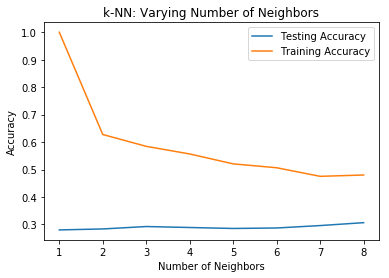

In [205]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('grade_bucket_classifer.png')

In [ ]:
"""
The accuracy does not seem to rise above about 30% for any value of K, so the classifation accuracy is weak for this 
model.
"""

In [ ]:
"""
This model will only look at pass/fail values for students. This could be useful.
"""

In [206]:
y = data.loc[:,'pass']
X = data.loc[:,['1', '2', '3', '4']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [207]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

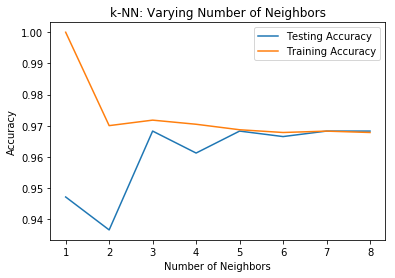

In [208]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('figures/pass classifier.png')

In [209]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9683098591549296


In [222]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [211]:
y_pred = knn.predict(X)

In [246]:
confusion_matrix(y, y_pred, [1,0])

array([[2749,    0],
       [  90,    0]])

In [ ]:
"""
How to interpret this?
Class 1 = when the thing is equal to 1, so when a student passes
Class 2 = when the thing is equal to 0, so when a student fails

The predicted values come from y_pred.

The totals match up with the thing, so maybe that is ok.

We have about 90 false negatives and 2749 True negatives.

A negative makes it sound like a student fails though... most of those were 1's not 0's.

I fixed it with a transformation.

We identified more people as passing with this..., but how do I find out if someone is a failure based off of this.
I might have to change my model to make a positive an at-risk student, so that we can identify them? 

or just do a .predict() on new data, and the count all of the people that were 0's.

We had ZERO True negatives or false negatives. That means that everyone was a positive which is also wrong...


It was only right by coincidence.

New question time

BRAINSTORM:

Look at total attempts on guided learning.

Maybe the timeframe was too short.

Maybe there is an easier indicator, like what the grade was their first project? or whatever would be an early but 
important grade. I think that as long as they can withdraw before the end october 3rd, then that would be better 
than nothing, so I could also just increase the number of weeks by about 1. That would not be enough time, so the
solution needs to be something else.


Figure this stuff out by the end of tomorrow - Have to talk with dad about this.

New Goals:
Finish the first 4 slides today. That work is basically just copy and paste and some bullshitting
Then finish the rest of the presentation up until the ML portion by the end of Wednesday. I can do some extra
stuff to work with on Thursday once I can talk to dad.

I can still add this to the report, just to show that I did this work and did run into problems and used my better
judgement. It is possible that there is not an easy way to determine this so early on and that can be part of my
recommendation to Perceivant.







"""

In [ ]:
"""
If I wanted to do all of the fine tuning things, then I would have to redo this as a logistic regression per the 
example. Which is fine since that can be used as a binary classifier anyway. Then I can fine tune it which would 
look really good in my final project. This might be enough to turn in if I can get that done.
Time for hyper-parameter tuning
"""

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [186]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [191]:
logreg = LogisticRegression()

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

In [199]:
logreg_cv = GridSearchCV(logreg,param_grid, cv=5)

In [200]:
logreg_cv.fit(X_train,y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.9671168526130358


/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

In [ ]:
"""
So even with the hyperparameters tuned, this model does not perform significantly better. It actually performed worse
this time.
The Best score is: 0.9683098591549296 using KMeans Classifier.

The conclusion is that within the first four weeks of class (If I did this right) which will be around Sept 23. Not
sure if that is too far in or if I did this right. I would have thought that we would want to know by about 
Sept 10th-ish at the latest - Have to talk to someone about this. With Sept 23 as the cut off date, we can predict
with about 96.831% accuracy if a student will pass or fail the class (a 1 or 0 corresponding to above or below 60%)
 
I should do a confusion matrix, so that I can give more accurate suggestions. That is the least I can do to actually
measure the performance of the models I created.
"""

In [ ]:
"""
***
The shit above is broken

Working with alternative stuff below
***
"""

In [250]:
attempts_week = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/attempt_by_week.csv', index_col = 0)
attempts_week


,1,2,3,4
user_param_external_user_id,,,,
263,218,12,233,64
433,0,14,0,63
1114,15,0,0,0
1229,41,0,0,0
1282,143,82,174,210
1669,163,0,232,278
1778,5,282,34,197
2168,15,267,0,0
2355,209,920,281,466


In [ ]:
"""
Try KMeans and Logistic Regression w/ GridsearchCV first. Then go talk to dad if that fails too.
"""

In [251]:
data2 = pd.merge(grades, attempts_week, left_on = 'student id', right_on = 'user_param_external_user_id')
data2.head()

,student id,unposted final score,grade_bucket,pass,1,2,3,4
0,37888,86.29,1,1,180,164,16,493
1,37902,93.67,2,1,144,399,173,118
2,37956,93.09,2,1,143,76,172,132
3,38080,95.92,3,1,220,208,500,1
4,38176,83.30,1,1,164,92,139,149


In [252]:
y = data2.loc[:,'grade_bucket']
X = data2.loc[:,['1', '2', '3', '4']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [253]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

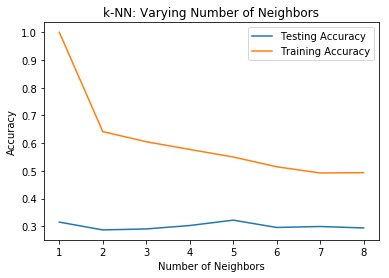

In [254]:
#TURN THIS INTO A FUNCTION BEFORE TURNING THIS IN; REMEMBER D.R.Y, I'VE USED THIS CODE 3X ALREADY

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('figures/pass classifier.png')

In [ ]:
"""
Now with 'pass' instead of 'grade_bucket'
"""

In [259]:
y = data2.loc[:,'pass']
X = data2.loc[:,['1', '2', '3', '4']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [260]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

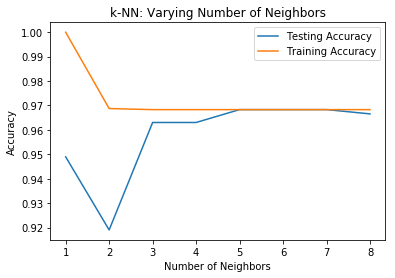

In [261]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('figures/pass classifier.png')

In [262]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X)
confusion_matrix(y, y_pred, [1,0])

0.9683098591549296


array([[2749,    0],
       [  90,    0]])